# Week-3

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns 
import pandas as pd

# Read Dataset

In [15]:
df = pd.read_csv("/kaggle/input/titanic-dataset/Titanic-Dataset.csv")
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [16]:
df.shape

(891, 12)

In [17]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [18]:
df.columns.values

array(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'], dtype=object)

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [20]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

# Handle missing values (basic & correct)

In [35]:
df.drop(columns=['Cabin'], inplace=True, errors='ignore')
print(df.columns)   # VERIFY


Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Embarked', 'AgeGroup'],
      dtype='object')


In [37]:
df['Age'] = df['Age'].fillna(df['Age'].median())


In [38]:
df['Age'].isnull().sum()


np.int64(0)

# Survival Analysis

In [27]:
survival_by_sex = df.groupby('Sex')['Survived'].mean()  #Survival rate by Sex
survival_by_sex


Sex
female    0.742038
male      0.188908
Name: Survived, dtype: float64

In [28]:
survival_by_class = df.groupby('Pclass')['Survived'].mean()   #Survival rate by Passenger Class
survival_by_class


Pclass
1    0.629630
2    0.472826
3    0.242363
Name: Survived, dtype: float64

In [30]:
df['AgeGroup'] = pd.cut(         #Create Age Buckets
    df['Age'],
    bins=[0, 12, 18, 40, 60, 100],
    labels=['Child', 'Teen', 'Adult', 'Middle-Age', 'Senior']
)


In [31]:
survival_by_age = df.groupby('AgeGroup')['Survived'].mean()    #Survival by Age Group
survival_by_age


/tmp/ipykernel_55/3540853091.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  survival_by_age = df.groupby('AgeGroup')['Survived'].mean()


AgeGroup
Child         0.579710
Teen          0.428571
Adult         0.360465
Middle-Age    0.390625
Senior        0.227273
Name: Survived, dtype: float64

# Bar chart – Survival by Sex

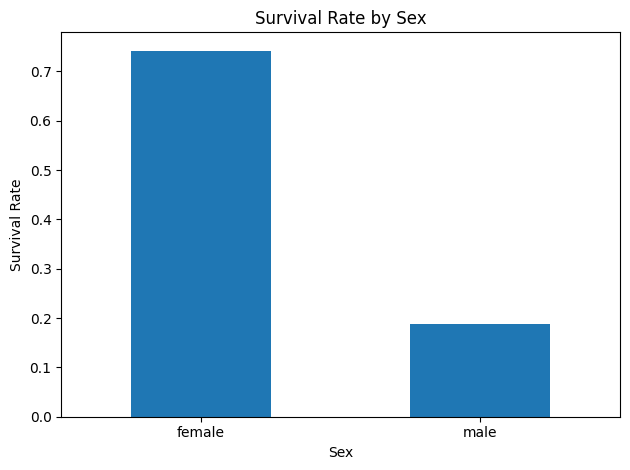

In [32]:
plt.figure()
survival_by_sex.plot(kind='bar')
plt.title("Survival Rate by Sex")
plt.ylabel("Survival Rate")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


# Bar chart – Survival by Class

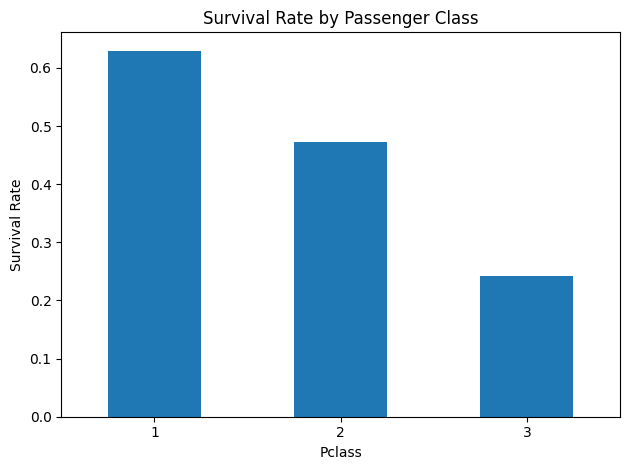

In [33]:
plt.figure()
survival_by_class.plot(kind='bar')
plt.title("Survival Rate by Passenger Class")
plt.ylabel("Survival Rate")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


# Violin plot – Age vs Survival

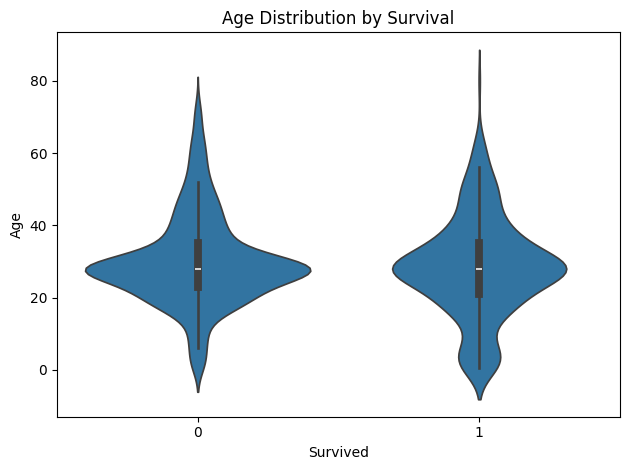

In [34]:
plt.figure()
sns.violinplot(x='Survived', y='Age', data=df)
plt.title("Age Distribution by Survival")
plt.tight_layout()
plt.show()


# Short insight report

In [ ]:
• Female passengers had a significantly higher survival rate than males.
• Passengers in 1st class were more likely to survive compared to lower classes.
• Children showed better survival chances than adults.
• Older passengers had lower survival probability.
• Passenger class and sex were strong indicators of survival.
